In [1]:
# Exercicis d'algoritmes d'Agrupació.
# - Exercici 1
#Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, 
# i classifica els diferents registres utilitzant l'algorisme de K-means.
#Important: Tingues en compte que prèviament et caldrà preparar el dataset.


#- Exercici 2
#Classifica els diferents registres utilitzant l'algoritme de clustering jeràrquic.

#- Exercici 3
#Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [2]:
###############################################################################
######                 CARGO LAS LIBRERIAS NECESARIAS                    ###### 
###############################################################################

# Cargamos las librerias que necesitamos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

 
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



In [3]:
###############################################################################
######              ANALIZO ESTADÍSTICAMENTE LOS DATOS                   ###### 
###############################################################################

dades = pd.read_csv("Publicacions Facebook Thailandia.csv")
dades.head()
dades.info()
dades.shape
# Descripción estadística
dades.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
###############################################################################
######    CUENTO LOS DATOS NULOS-->  Y ELIMINO LAS 3 ULTIMAS COLUMNAS    ###### 
###############################################################################

nulldata = dades[dades.isnull().any(axis=1)].count()
print(nulldata)

        # Vemos que las últimas 4 columnas tienen UNICAMENTE datos nulos: nos interesa eliminarlas.
        # Si eliminasemos las filas con dropna, se eliminarian todas las filas con datos, por lo que no nos interesa este método. 
        # Eliminamos por lo tanto las 4 últimas columnas, que únicamente tienen datos nulos:

dades_netes = dades.drop(axis=1, columns=['Column1', 'Column2','Column3','Column4'])

status_id           7050
status_type         7050
status_published    7050
num_reactions       7050
num_comments        7050
num_shares          7050
num_likes           7050
num_loves           7050
num_wows            7050
num_hahas           7050
num_sads            7050
num_angrys          7050
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64


In [5]:
###############################################################################
######   AHORA TAMBIÉN ELIMINO LAS 3 PRIMERAS COLUMNAS (TYPE: OBJECT)    ###### 
###############################################################################

print(dades.groupby('status_type').size())

dades_netes = dades_netes.drop(['status_id','status_type', 'status_published'], axis=1)


status_type
link        63
photo     4288
status     365
video     2334
dtype: int64


In [6]:
###############################################################################
######              TRANSFORMO LOS DATOS EN TIPO FLOAT                   ###### 
###############################################################################
dades_netes = dades_netes.astype(float)

dades_netes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reactions  7050 non-null   float64
 1   num_comments   7050 non-null   float64
 2   num_shares     7050 non-null   float64
 3   num_likes      7050 non-null   float64
 4   num_loves      7050 non-null   float64
 5   num_wows       7050 non-null   float64
 6   num_hahas      7050 non-null   float64
 7   num_sads       7050 non-null   float64
 8   num_angrys     7050 non-null   float64
dtypes: float64(9)
memory usage: 495.8 KB


      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          0.646104      0.323350    1.686879   0.482727   1.983266  0.196196   
1          0.173192      0.252206    0.304144   0.144720   0.318454  0.147879   
2          0.006738      0.013089    0.129017   0.024571   0.206938  0.033187   
3          0.257499      0.252206    0.304144   0.231495   0.318454  0.147879   
4          0.037003      0.252206    0.304144   0.024571   0.093286  0.147879   
...             ...           ...         ...        ...        ...       ...   
7045       0.305057      0.252206    0.304144   0.280445   0.318454  0.147879   
7046       0.462863      0.252206    0.304144   0.447319   0.293436  0.147879   
7047       0.493128      0.252206    0.304144   0.476244   0.293436  0.147879   
7048       0.261316      0.238717    0.136959   0.298053   0.268417  0.147879   
7049       0.460702      0.252206    0.304144   0.440644   0.318454  0.147879   

      num_hahas  num_sads  

<AxesSubplot:>

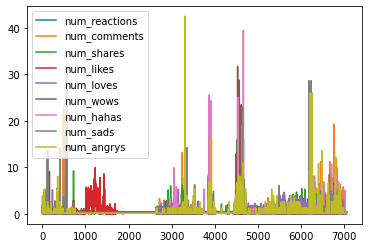

In [7]:
###############################################################################
######  Ahora voy a ver si hay datos atípicos / aberrantes (outliers)    ###### 
###############################################################################

# MÉTODO 1 : CÁLCULO DE LA PUNTUACIÓN Z: 
# El puntaje z nos dice cuántas desviaciones estándar tiene un valor dado de la media. 
# Usamos la siguiente fórmula para calcular una puntuación z:
    # z = (X – μ) / σ
    # dónde:
        # X es un único valor de datos sin procesar
        # μ es la media de la población
        # σ es la desviación estándar de la población

# Se puede definir una observación como un valor atípico si tiene una puntuación z menor que -3 o mayor que 3.
################################################################################################################


# Encontramos el valor z-score de cada observación
z = np.abs(stats.zscore(dades_netes))
print(z)

z.plot()

# Solo mantenemos las filas con puntuación z menor que el valor absoluto de 3 
#  data_clean = dades_netes2[(z<3).all(axis=1)]                                - - - - - - > NO FUNCIONA, NO SÉ POR QUÉ


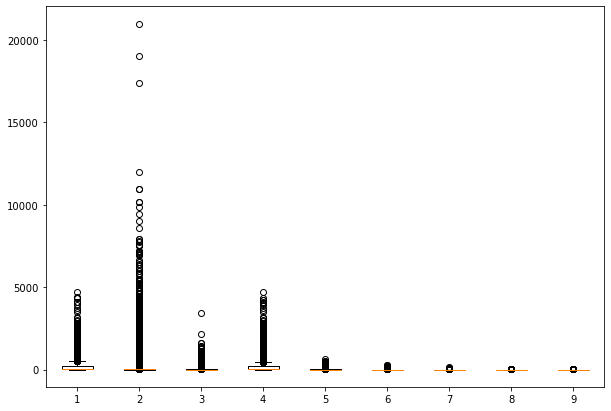

In [8]:
# MÉTODO 2 : MEDIANTE BOXPLOTS

# Crear la figura
fig = plt.figure(figsize =(10, 7))
 
# Crear el plot
plt.boxplot(dades_netes)
    #  plt.boxplot(dades_netes['num_reactions'])

# Mostrar el plot
plt.show()

# Considero como atípicos los 3 valores más altos de la columna 2 (Num_comments)
# Decido cambiarlos por la media de los valores. 




In [9]:
####################################################################
######     LOCALIZO LOS 3 VALORES MÁXIMOS DE LA COLUMNA 2     ###### 
####################################################################

dades.nlargest(3, 'num_comments')

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
498,246675545449582_1121060898011038,video,11/30/2016 8:46,564,20990,154,473,82,3,3,3,0,NaN,NaN,NaN,NaN
480,246675545449582_1134207113363083,video,12/9/2016 21:48,452,19013,161,353,92,2,3,2,0,NaN,NaN,NaN,NaN
6757,1050855161656896_1404341292974946,video,9/25/2017 10:35,708,17404,913,525,157,6,14,4,2,NaN,NaN,NaN,NaN


In [10]:
############################################################################
######      ELIMINO LOS 3 VALORES QUE HE CONSIDERADO ATÍPICOS         ###### 
############################################################################

dades_netes = dades_netes.drop([498,480,6757], axis=0)

In [11]:
###############################################################################
######               VALORES MÁXIMOS DE CADA COLUMNA                     ###### 
###############################################################################

dades_netes.max(axis=0)

num_reactions     4710.0
num_comments     12003.0
num_shares        3424.0
num_likes         4710.0
num_loves          657.0
num_wows           278.0
num_hahas          157.0
num_sads            51.0
num_angrys          31.0
dtype: float64

In [12]:
#############################################################################
######     COMPRUEBO QUE LOS 3 VALORES MÁXIMOS YA NO SON ATÍPITOS      ###### 
#############################################################################

dades_netes.nlargest(3, 'num_comments')

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
3246,624.0,12003.0,856.0,516.0,94.0,4.0,8.0,2.0,0.0
6762,634.0,10960.0,783.0,540.0,70.0,5.0,11.0,8.0,0.0
6799,553.0,10926.0,429.0,468.0,66.0,2.0,13.0,3.0,1.0


          0         1         2         3         4         5         6  \
0  0.112314  0.042656  0.076519  0.091720  0.140030  0.010791  0.006369   
1  0.031847  0.000000  0.000000  0.031847  0.000000  0.000000  0.000000   
2  0.048195  0.019662  0.016647  0.043312  0.031963  0.003597  0.006369   
3  0.023567  0.000000  0.000000  0.023567  0.000000  0.000000  0.000000   
4  0.045223  0.000000  0.000000  0.043312  0.013699  0.000000  0.000000   

          7    8  
0  0.019608  0.0  
1  0.000000  0.0  
2  0.000000  0.0  
3  0.000000  0.0  
4  0.000000  0.0  


<AxesSubplot:>

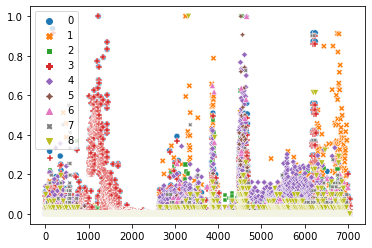

In [13]:
######################################################################################
######                 TAMBIEN DEBERÍAMOS NORMALIZAR LOS DATOS                  ###### 
######################################################################################

#Normalizado de datos #1

dades_normals=dades_netes.values
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(dades_normals)
X_norm=pd.DataFrame(x_scaled)

print(X_norm.head())
sb.scatterplot(data=X_norm)


<AxesSubplot:xlabel='num_reacts', ylabel='num_comments'>

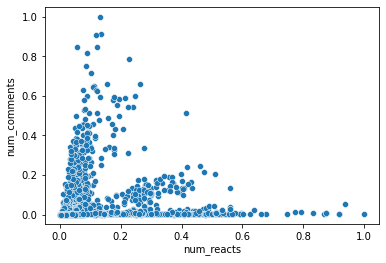

In [14]:

#Normalizado de datos #2


scaler = MinMaxScaler()

transformed_dades = scaler.fit_transform(dades_netes.iloc[:, :2])
transformed_dades=pd.DataFrame(transformed_dades)

transformed_dades.columns = 'num_reacts','num_comments'

transformed_dades.head()



#%% Se normalizan los datos con MinMax()
#min_max_scaler = preprocessing.MinMaxScaler() 
#dades_normalizadas = min_max_scaler.fit_transform(dades_netes)
                                                 
#dades_normalizadas = pd.DataFrame(dades_normalizadas) # Hay que convertir a DF el resultado.
#dades_normalizadas = dades_normalizadas.rename(columns = {0: 'num_comments', 1: 'num_angrys'})


sb.scatterplot(data=transformed_dades, x="num_reacts", y="num_comments")

In [15]:
################################################################
######    FINALMENTE, PUEDO EMPEZAR CON EL EJERCICIO      ###### 
################################################################

# Classifica els diferents registres utilitzant l'algoritme de K-means.

    # Hay 5 métodos de clasificación, nosotros veremos el K-Means. Los métodos son:
        # 1) K-Means Clustering
        # 2) Mean-Shift Clustering
        # 3) Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
        # 4) Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
        # 5) Agglomerative Hierarchical Clustering

    #    https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68


In [16]:
###############################################
######    CLASIFICACIÓN CON K-MEANS      ###### 
###############################################

In [17]:
# Definimos la entrada

#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. 
x = np.array(dades[['num_comments']])
y = np.array(dades['num_reactions'])
x.shape

(7050, 1)

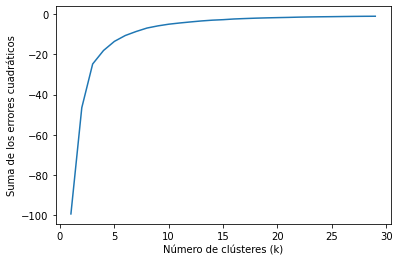

In [18]:
#Realizo una gráfica elbow o de codo para determinar el número óptimo de clústeres. 

#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(transformed_dades).score(transformed_dades) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)


# Estableixo el valor de k en 5 (podria se un altre)

In [19]:
# Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(dades_netes)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.04562418e+02 4.21404402e+01 1.24799606e+01 9.88708936e+01
  4.67394875e+00 5.15440210e-01 2.85479632e-01 1.56044678e-01
  5.81471748e-02]
 [4.50000000e+02 1.31759466e+03 2.99368932e+02 3.36808252e+02
  9.88907767e+01 8.68689320e+00 4.14320388e+00 8.27669903e-01
  6.33495146e-01]
 [6.96323529e+02 7.78482353e+03 6.55470588e+02 5.42529412e+02
  1.33764706e+02 6.58823529e+00 8.35294118e+00 3.67647059e+00
  1.41176471e+00]
 [1.77921898e+03 1.19917275e+02 3.83625304e+01 1.75648175e+03
  1.72092457e+01 4.15328467e+00 1.05109489e+00 1.87347932e-01
  1.36253041e-01]
 [4.28352941e+02 4.02875490e+03 4.27058824e+02 3.29921569e+02
  8.41862745e+01 4.22549020e+00 7.14705882e+00 2.11764706e+00
  7.54901961e-01]]


In [20]:
# Etiqueto el dataframe y añado la columna label

labels = kmeans.predict(dades_netes)
dades_netes['label'] = labels
dades_netes.head(40)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,529.0,512.0,262.0,432.0,92.0,3.0,1.0,1.0,0.0,0
1,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0
2,227.0,236.0,57.0,204.0,21.0,1.0,1.0,0.0,0.0,0
3,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0
4,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0,0
5,217.0,6.0,0.0,211.0,5.0,1.0,0.0,0.0,0.0,0
6,503.0,614.0,72.0,418.0,70.0,10.0,2.0,0.0,3.0,1
7,295.0,453.0,53.0,260.0,32.0,1.0,1.0,0.0,1.0,0
8,203.0,1.0,0.0,198.0,5.0,0.0,0.0,0.0,0.0,0
9,170.0,9.0,1.0,167.0,3.0,0.0,0.0,0.0,0.0,0


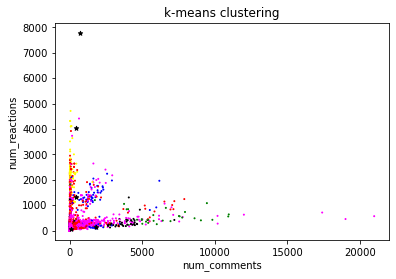

In [50]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia', 'black']
asignar=[]+['red','red','red']
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('num_comments')
plt.ylabel('num_reactions')
plt.title('k-means clustering')
plt.show()



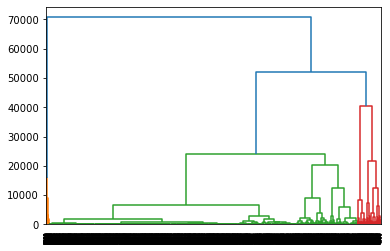

In [38]:
#- Exercici 2
#Classifica els diferents registres utilitzant l'algoritme de clustering jeràrquic.

# 1 # - - > IMPORTAMOS LIBRERÍAS

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 2 # - - > HACEMOS DENDOGRAMA

X = dades_netes.iloc[:, [0,1]].values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Establecemos 6 clústeres (6 agrupaciones). 

In [46]:
# 3 # - - > CALCULAMOS LA DISTANCIA ENTRE LOS CLUSTERS QUE HEMOS ESTABLECIDO

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(X)
labels2 = model.labels_
print(labels)


# La variable labels nos da un array de integrers que se corresponden a la categoría

[0 4 0 ... 4 0 4]


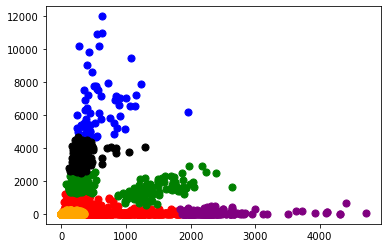

In [36]:
# 4 # - - > REPRESENTAMOS GRÁFICAMENTE LA CLASIFICACIÓN REALIZADA POR EL ALGORITMO

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=50, marker='o', color='black')
plt.show()

In [49]:
#- Exercici 3
#Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

from sklearn.metrics import silhouette_samples, silhouette_score


score = silhouette_score(X, labels, metric='euclidean')
#
# Print the score
#
print('SILHOUETTE SCORE: %.2f' % score)

SILHOUETTE SCORE: 0.672
